<a href="https://colab.research.google.com/github/Developer-Yee/2021-1-Data-Science/blob/main/assignments/yee/04~08-%ED%95%9C%EC%84%B1%ED%9D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Assignment 1.
우리는 붓꽃의 **꽃받침의 길이, 꽃받침의 너비, 꽃잎의 길이, 꽃잎의 너비**를 통해서, **꽃의 종류**를 구분 해 볼 것입니다. **Input**으로 주어 지는 데이터는 다음과 같습니다.

- Sepal Length: 꽃받침의 길이 정보이다.
- Sepal Width: 꽃받침의 너비 정보이다.
- Petal Length: 꽃잎의 길이 정보이다.
- Petal Width: 꽃잎의 너비 정보이다.
- Species: 꽃의 종류 정보이다. **setosa / versicolor / virginica** 의 3종류로 구분된다.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42, shuffle=True)

print("X_train의 shape:", X_train.shape)
print("X_test의 shape:", X_test.shape)
print("y_train의 shape:", y_train.shape)
print("y_test의 shape:", y_test.shape)

X_train의 shape: (100, 4)
X_test의 shape: (50, 4)
y_train의 shape: (100,)
y_test의 shape: (50,)


### 1-1. Data Normalization
첫 번째로, 데이터를 정규화 하는 것이 중요 할 것 같습니다. 데이터를 정규화 해 보세요.

(Min - Max 정규화를 이용하면 될 것 같죠? hint: ndarray.min(), ndarray.max())

In [3]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())
print(X_train[:10])

[[0.73684211 0.36842105 0.53947368 0.15789474]
 [0.98684211 0.38157895 0.85526316 0.26315789]
 [0.72368421 0.38157895 0.57894737 0.18421053]
 [0.65789474 0.44736842 0.17105263 0.01315789]
 [1.         0.35526316 0.86842105 0.25      ]
 [0.75       0.34210526 0.52631579 0.11842105]
 [0.67105263 0.43421053 0.17105263 0.01315789]
 [0.64473684 0.44736842 0.15789474 0.02631579]
 [0.65789474 0.48684211 0.23684211 0.03947368]
 [0.64473684 0.25       0.44736842 0.11842105]]


## 1-2. Data Training
그 다음으로는 이제 데이터를 학습 시킬 시간입니다! SVM 모듈을 import 한 후, 학습을 시켜 보도록 하겠습니다.

In [4]:
from sklearn.svm import SVC

svm = SVC(C=2)
# <your code: 학습 과정을 넣어 주세요>
svm.fit(X_train, y_train)
accuracy = (sum(svm.predict(X_test) == y_test) / 50) * 100
print(f'정확도 (accuracy): {accuracy}%')

정확도 (accuracy): 100.0%


## Assignment 2.
다음은 **MNIST 데이터**에 대해 분류를 해보는 연습을 해 보겠습니다. **MNIST**는 손글씨 데이터로, **Input Data**는 [28 x 28]의 데이터로 이루어져 있습니다. 일단, 우리가 이를 학습 시키기 전에 한번 데이터를 확인 해 볼까요?

이 예제는 DNN을 이용하기 때문에, **Pytorch**로 진행 하겠습니다. 실습은 **Hyperparameter**만 고치면 됩니다.

**학습률 95%에 도전 해 보세요!**

In [5]:
import time
import random
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [6]:
# 이 부분은 절대 변경하지 마세요.

RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

## 2-0. Data Load
데이터를 불러와 보겠습니다. `transforms.Compose`를 이용하여, 데이터를 pytorch에서 사용하는 **Tensor**형으로 바꾸고, 이를 **Gaussian Distribution**으로 정규화합니다.

In [7]:
# 수정 가능한 셀입니다.
BATCH_SIZE = 64  # 60000을 사용하면, Full-Batch 학습을 진행 합니다.

In [8]:
# Don't Touch!
custom_train_transform = transforms.Compose([  
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

`MNIST`를 이용하여 **MNIST** 데이터를 불러 오고, 이를 transform 해 줍니다. 또한, `DataLoader`를 이용하여, 셔플을 해준 후, 미니 배치를 생성 합니다.

In [9]:
train_dataset = MNIST(".", train=True, download=True, transform=custom_train_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          drop_last=True,
                          num_workers=2)


test_dataset = MNIST(".", train=False, download=True, transform=custom_test_transform)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=2)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


데이터가 잘 들어 왔는지 확인 합니다.

 | Batch index: 0 | Batch size: 64
input batch의 모양: (64, 1, 28, 28)


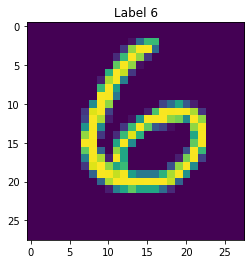

break minibatch for-loop


In [10]:
for batch_idx, (x, y) in enumerate(train_loader):
    print(' | Batch index:', batch_idx, end='')
    print(' | Batch size:', y.size()[0])

    x = x.to(DEVICE)
    y = y.to(DEVICE)

    x_numpy = x.numpy()
    y_numpy = y.numpy()
    print('input batch의 모양:', x_numpy.shape)
    plt.imshow(x_numpy[0].reshape(28, 28))
    plt.title(f'Label {y_numpy[0]}')
    plt.show()

    print('break minibatch for-loop')
    break

## 2-1. Deep Neural Network
아래 셀은 Deep Neural Network를 정의 합니다.

In [11]:
# 변경 가능 합니다.
class DNN(nn.Module):
    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_hidden_3, num_classes):
        """
        num_features: input feature 갯수
        num_hidden_1: 첫 번째 레이어의 노드 갯수
        num_hidden_2: 두 번째 레이어의 노드 갯수
        num_hidden_3: 세 번째 레이어의 노드 갯수
        num_classes: 분류하고자 하는 class 갯수
        """
        super(DNN, self).__init__()
        
        self.num_classes = num_classes
        
        # 수정 가능!: 레이어를 쌓는 법을 아신다면, 여기서 레이어를 쌓으셔도, 혹은 지우셔도 무방 합니다. (단, nn.Linear만)
        self.linear_1 = nn.Linear(num_features, num_hidden_1)
        self.linear_2 = nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_3 = nn.Linear(num_hidden_2, num_hidden_3)
        self.linear_out = nn.Linear(num_hidden_3, num_classes)
    
    def forward(self, x):
        out = self.linear_1(x)
        out = torch.relu(out)
        out = self.linear_2(out)
        out = torch.relu(out)
        out = self.linear_3(out)
        out = torch.relu(out)
        logits = self.linear_out(out)
        probas = torch.sigmoid(logits)
        return logits, probas

# 수정 가능!
model = DNN(num_features=28*28,
        num_hidden_1=100,
        num_hidden_2=50,
        num_hidden_3=20,
        num_classes=10)

model = model.to(DEVICE)

## 2-2. Training
여기서는 **Optimizer**와, **Epoch**를 설정 합니다. 

In [19]:
# 수정 가능!
LEARNING_LATE = 0.05  # 흠.. 이 친구는 학습률로는 너무 큰 것 같네요..
NUM_EPOCHS = 5

In [20]:
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_LATE)

In [21]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples
    

start_time = time.time()
train_acc_lst, test_acc_lst = [], []
train_loss_lst, test_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)  # 모델 계산
        cost = F.cross_entropy(logits, targets)  # 크로스 엔트로피 계산
        optimizer.zero_grad()  # 기울기 초기화
        
        cost.backward()  # 역전파
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()  # step 적용
        
        ### LOGGING
        if not batch_idx % 40:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # 매 Epoch마다 evaluation을 진행합니다. 
    # Epoch마다 Loss를 기록하여 학습과정을 살펴보고 Underfitting, Overfitting 여부를 확인합니다.
    model.eval()
    with torch.set_grad_enabled(False): # Gradient 계산이 안되도록
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=DEVICE) # train acc, loss 계산
        test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, device=DEVICE)    # test acc, loss 계산
        
        # list에 train, test의  acc, loss 추가
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        train_loss_lst.append(train_loss)
        test_loss_lst.append(test_loss)
        
        # 로깅
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Test Acc.: {test_acc:.2f}%')
    
    # 1 epoch 학습 소요시간
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')

# 총 학습 소요시간
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/005 | Batch 000/937 | Cost: 0.3845
Epoch: 001/005 | Batch 040/937 | Cost: 1.4855
Epoch: 001/005 | Batch 080/937 | Cost: 0.6567
Epoch: 001/005 | Batch 120/937 | Cost: 0.1849
Epoch: 001/005 | Batch 160/937 | Cost: 0.2180
Epoch: 001/005 | Batch 200/937 | Cost: 0.3019
Epoch: 001/005 | Batch 240/937 | Cost: 0.4417
Epoch: 001/005 | Batch 280/937 | Cost: 0.3386
Epoch: 001/005 | Batch 320/937 | Cost: 0.2664
Epoch: 001/005 | Batch 360/937 | Cost: 0.4847
Epoch: 001/005 | Batch 400/937 | Cost: 0.2179
Epoch: 001/005 | Batch 440/937 | Cost: 0.4800
Epoch: 001/005 | Batch 480/937 | Cost: 0.2106
Epoch: 001/005 | Batch 520/937 | Cost: 0.1408
Epoch: 001/005 | Batch 560/937 | Cost: 0.3541
Epoch: 001/005 | Batch 600/937 | Cost: 0.2148
Epoch: 001/005 | Batch 640/937 | Cost: 0.1283
Epoch: 001/005 | Batch 680/937 | Cost: 0.1777
Epoch: 001/005 | Batch 720/937 | Cost: 0.3163
Epoch: 001/005 | Batch 760/937 | Cost: 0.1141
Epoch: 001/005 | Batch 800/937 | Cost: 0.2345
Epoch: 001/005 | Batch 840/937 | C

## 2-3. Evaluation
테스트 데이터와 학습 데이터의 Loss 변화를 확인 합니다.

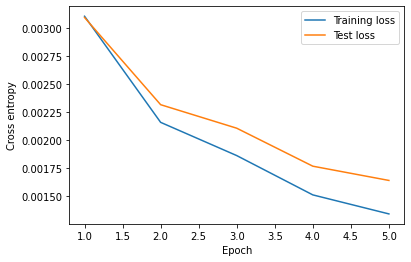

In [23]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), test_loss_lst, label='Test loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

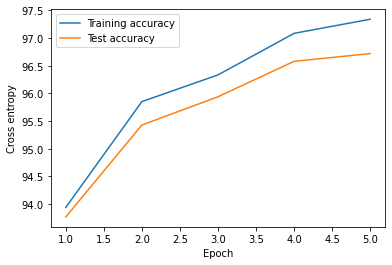

In [24]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), test_acc_lst, label='Test accuracy')
plt.legend(loc='upper left')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

In [25]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

Test accuracy: 96.72%


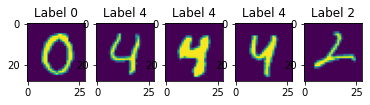

In [26]:
for batch_idx, (x, y) in enumerate(test_loader):
    x = x.to(DEVICE)
    y = y.to(DEVICE)

    x_numpy = x.numpy()
    
    fig, axes = plt.subplots(1, 5)
    
    for ax in axes:
        index = random.randint(0, 64)
        logits, probas = model(x[index].view(-1, 28*28))
        _, predicted_labels = torch.max(probas, 1)
        ax.imshow(x_numpy[index].reshape(28, 28))
        ax.set_title(f'Label {predicted_labels[0]}')
        
    plt.show()
    break

## 2-4. Discussion
1. Train Data에 대한 정확도와, Test Data에 대한 정확도가 왜 다를까요?
- *학습된 모델이 Train Data에 overfitting 되어 unseen data에서 좋은 성능을 내지 못함.*

2. 다른 사람들은 정확도가 99퍼가 넘는 모델도 만들던데, DNN의 한계가 있다면 어떤 점이 있을까요? (Hint: 우리는 28x28의 이미지를 768x1로 쫙 펴서 넣어 줬습니다.)
- *28x28 이미지를 1차원으로 펴주었기 때문에 28x28속 의미있는 데이터를 추출해내지 못함.*